# Introduction to Deep Learning with Keras



# Workshop on Machine Learning in -tagging.


Outline for Today
1. Navigating the zoo of deep learning libraries — why Keras?
2. The right level of abstraction, FP
3. Constructing models with the functional API
4. Useful guidance for setting up an experiment

In [2]:
from keras.datasets.boston_housing import load_data
(X_train, y_train), (X_test, y_test) = load_data()


65536/57026 [==================================] - 0s 1us/step


In [3]:
X_test.shape


(102, 13)

In [4]:
y_test.shape


(102,)

# Building a DNN in Keras

A supervised neural network, at it's core, consists of three components.

A computation graph, i.e., the network itself with all of it's layers
A loss function to penalize a problem dependent notion of incorrectness
mean squared error, mean absolute error, huber
cross entropy, KL-divergence
An optimizer, or a way to learn the parameters of your model with respect to a loss
Adam, Adagrad, RMSProp, Adadelta, Vanilla SGD, etc.
Ability to anneal
Let's start from the canonical version of a DNN, a simple multilayer perceptron-like architecture. Building this structure, i.e., a linear sequence of non-linear transforms, is very easy in Keras.

Let's make a network that reads in the 13 inputs from the Boston Housing dataset, has two hidden layers, and one linear output. We'll think about layers as mathematical functions using the Keras functional API.

In [6]:
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.utils.vis_utils import plot_model


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(13, ))

# all Keras Ops look like z = f(z) (like functional programming)
h = Dense(20)(x)
h = Activation('relu')(h)

h = Dense(20)(h)
h = Activation('relu')(h)

# our output is a single number, the house price.
y = Dense(1)(h)

# A model is a conta
net = Model(x, y)

In [12]:
plot_model(net, to_file='basic.png')


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


To make this neural net useful, we need to compile it into a DAG (directed, acyclic graph). This is the declarative approach to deep learning. This compilation takes all of your ops, your loss, and your model, and constructs all of the operations to do gradient updates.

Let's use the Adam [arXiv/1412.6980] optimizer with a mean squared error loss function, i.e., 


In [13]:
net.compile(optimizer='adam', loss='mse')


Now, you're going to want to fit the model to your data. This is made very easy by the .fit member function of a model object. We might want to leave out a subset of our data, say 20%, for validation.

In addition, we might want to save a network and impose an ability to stop when a validation loss stops decreasing. Keras introduces this with callbacks.

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
callbacks = [
    # if we don't have a decrease of the loss for 10 epochs, terminate training.
    EarlyStopping(verbose=True, patience=10, monitor='val_loss'), 
    # Always make sure that we're saving the model weights with the best val loss.
    ModelCheckpoint('model.h5', monitor='val_loss', verbose=True, save_best_only=True)]

In [16]:
history = net.fit(X_train, y_train, validation_split=0.2, epochs=60, verbose=2, callbacks=callbacks)



Epoch 1/60

Epoch 00001: val_loss improved from inf to 1548.45154, saving model to model.h5
11/11 - 1s - loss: 4590.8374 - val_loss: 1548.4515 - 995ms/epoch - 90ms/step
Epoch 2/60

Epoch 00002: val_loss improved from 1548.45154 to 359.23688, saving model to model.h5
11/11 - 0s - loss: 1092.5748 - val_loss: 359.2369 - 36ms/epoch - 3ms/step
Epoch 3/60

Epoch 00003: val_loss improved from 359.23688 to 211.67174, saving model to model.h5
11/11 - 0s - loss: 399.2033 - val_loss: 211.6717 - 37ms/epoch - 3ms/step
Epoch 4/60

Epoch 00004: val_loss improved from 211.67174 to 123.93632, saving model to model.h5
11/11 - 0s - loss: 230.1649 - val_loss: 123.9363 - 47ms/epoch - 4ms/step
Epoch 5/60

Epoch 00005: val_loss improved from 123.93632 to 103.66457, saving model to model.h5
11/11 - 0s - loss: 164.7570 - val_loss: 103.6646 - 44ms/epoch - 4ms/step
Epoch 6/60

Epoch 00006: val_loss improved from 103.66457 to 90.10807, saving model to model.h5
11/11 - 0s - loss: 130.5685 - val_loss: 90.1081 - 40m

Epoch 53/60

Epoch 00053: val_loss did not improve from 52.77029
11/11 - 0s - loss: 46.3195 - val_loss: 55.1034 - 25ms/epoch - 2ms/step
Epoch 54/60

Epoch 00054: val_loss improved from 52.77029 to 52.31355, saving model to model.h5
11/11 - 0s - loss: 47.3219 - val_loss: 52.3135 - 43ms/epoch - 4ms/step
Epoch 55/60

Epoch 00055: val_loss improved from 52.31355 to 52.03003, saving model to model.h5
11/11 - 0s - loss: 47.1590 - val_loss: 52.0300 - 43ms/epoch - 4ms/step
Epoch 56/60

Epoch 00056: val_loss did not improve from 52.03003
11/11 - 0s - loss: 50.1302 - val_loss: 53.7437 - 54ms/epoch - 5ms/step
Epoch 57/60

Epoch 00057: val_loss improved from 52.03003 to 51.56026, saving model to model.h5
11/11 - 0s - loss: 47.3402 - val_loss: 51.5603 - 46ms/epoch - 4ms/step
Epoch 58/60

Epoch 00058: val_loss did not improve from 51.56026
11/11 - 0s - loss: 45.6795 - val_loss: 52.1486 - 30ms/epoch - 3ms/step
Epoch 59/60

Epoch 00059: val_loss improved from 51.56026 to 50.31504, saving model to mode

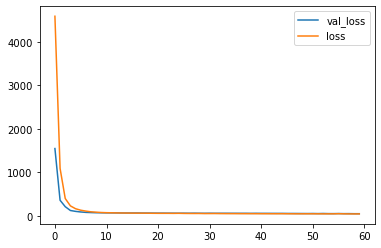

In [17]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()

In [18]:
# now I can evaluate what my 
net.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 53.1127


53.11274337768555

Though not a formal test, let's see how the output distribution looks between the true y_test and the 
 from our model.

In [19]:
yhat = net.predict(X_test)


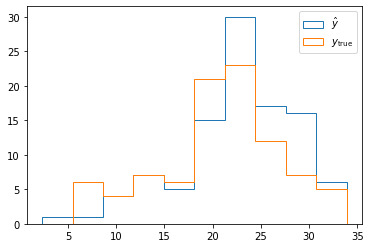

In [20]:
_, bins, _ = plt.hist(yhat, histtype='step', label=r'$\hat{y}$')
plt.hist(y_test, bins=bins, histtype='step', label=r'$y_{\mathsf{true}}$')
plt.legend()

So far, we've done nothing that you can't do in TMVA (maybe besides the Adam optimizer), so why use Keras? You gain the ability to work with things like sequence data, images, and although maybe not necessary for the Boston dataset, you are able to compose arbitrary graphs!

Let's quickly show how we can create a residual model with dropout for our boston housing model.

The basis of a residual block is the idea that learning the residual components beyond the identity function decouples some of the difficulties in learning complex funcionals. The idea is instead of having , we want  where our  is now tasked with learning a residual on the data

In [21]:
from keras.layers import Dropout, add


In [22]:
# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(13, ))

# we want this layer to be normal, but skip into a layer downstream
skip = Dense(20)(x)
h = Dropout(0.5)(skip)
h = Activation('relu')(h)

h = Dense(20)(h)
skip = add([h, skip])
h = Dropout(0.5)(skip)
h = Activation('relu')(h)

h = Dense(20)(h)
h = add([h, skip])
h = Dropout(0.5)(h)
h = Activation('relu')(h)

# our output is a single number, the house price.
y = Dense(1)(h)

# A model is a conta
resnet = Model(x, y)

In [23]:
plot_model(resnet, to_file='arch.png')


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Dealing with Sequences


Most applications of sequence / recurrent models around grounded in natural language processing or stock price analysis. Let's use a hypothetical example that is grounded in Physics.

To ground this problem, let's say we're building a network for an analysis that reads in all jets and all photons from two different streams. There are arbitrary numbers of jets and photons, so we need a model that can handle a sequence.

Let's have the following two constraints on our jets and photons:

We have a maximum of 8 jets with 6 features
We have a maximum of 2 photons with 11 features
We can order our physics object by some value, say , and construct a recurrent neural network, in particular a Bidirectional LSTM, to learn a function that maps this to signal/background

In [24]:
from keras.layers import LSTM, concatenate, Bidirectional


In [25]:
# you wound need to structure your input into this format such that it has shape (nb_samples, nb_objects, nb_features)
n_jets = 8
n_jet_feats = 6

n_photons =  2
n_photon_feats = 11

In [26]:
jets = Input(shape=(n_jets, n_jet_feats), name='jets')
photons = Input(shape=(n_photons, n_photon_feats), name='photons')

In [27]:
features = concatenate([
    Bidirectional(LSTM(10, name='jet_lstm'))(jets), 
    Bidirectional(LSTM(10, name='photon_lstm'))(photons), 
])

In [28]:
y = Activation('sigmoid', name='sigmoid')(Dense(1, name='logistic')(features))


In [29]:
rnn = Model([jets, photons], y)


In [30]:
plot_model(rnn, to_file='arnn.png')


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
